<a href="https://colab.research.google.com/github/mohithxoxo/unsupervised-Learning/blob/master/KMeans_Clustering_with_BankDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. K-Means Clustering:

In [230]:
import warnings
warnings.filterwarnings("ignore")

In [231]:
# Importing the data.
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/mohithxoxo/Datasets/master/fraud_transactions.csv")
data.head()

,starttime,stoptime,anumber,bnumber,duration,fee,destination,type,label
0,2018-05-02 09:13:24,2018-05-02 09:20:38,62770692960,1500200,434,6000,callcenter,Injapati,0
1,2018-05-18 16:49:19,2018-05-18 16:52:11,62770692960,1500200,172,2250,callcenter,Injapati,0
2,2018-05-18 18:15:17,2018-05-18 18:18:20,62770692960,1500200,183,3000,callcenter,Injapati,0
3,2018-05-31 08:52:46,2018-05-31 08:53:03,62770692253,1500788,17,750,callcenter,Injapati,0
4,2018-05-31 08:53:10,2018-05-31 08:53:24,62770692253,1500788,14,750,callcenter,Injapati,0


In [232]:
data['type'].value_counts()

SLJJ          7093
SLI 001       4035
Lokal          153
SLI 007        102
VoIP 01017      21
Injapati        14
Name: type, dtype: int64

In [233]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])
data['destination'] = le.fit_transform(data['destination'])

In [234]:
data = data.drop(columns=['starttime','stoptime','bnumber'])

In [235]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [236]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
sm = RandomOverSampler()

print("Before ", '\n',data.iloc[:,-1].value_counts(), '\n',)
X_sm , y_sm = sm.fit_resample(X,y)
print("After ", '\n',Counter(y_sm).keys(), '\n',Counter(y_sm).values())

Before  
 0    11021
1      397
Name: label, dtype: int64 

After  
 dict_keys([0, 1]) 
 dict_values([11021, 11021])


In [237]:
X_sm = pd.DataFrame(X_sm)
X_sm

,0,1,2,3,4
0,62770692960,434,6000,119,0
1,62770692960,172,2250,119,0
2,62770692960,183,3000,119,0
3,62770692253,17,750,119,0
4,62770692253,14,750,119,0
...,...,...,...,...,...
22037,62770692960,37,8591,20,2
22038,62770692960,30,4295,20,2
22039,62770692960,69,12886,20,2
22040,62770692960,134,21477,20,2


# Using the Elbow Method to find the Optimal No. of clusters.

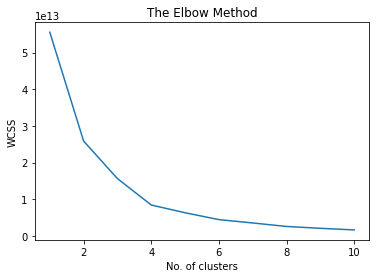

In [238]:
from sklearn.cluster import KMeans
wcss_lst = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_sm)
    wcss = kmeans.inertia_
    wcss_lst.append(wcss)


import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss_lst)
plt.title("The Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

As for No. of clusters = 4 the graph becomes almost flat, it decreases very slowly, hence selecting 4 Clusters as our optimum no.

In [239]:
# Training the Model on 4 clusters
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
kmeans.fit(X_sm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Each of the cluster is a grp of customers n that will be our dependent variable.

In [240]:
y_hat = kmeans.fit_predict(X_sm)
X_sm['y_hat'] = y_hat
X_sm['labels'] = y_sm

In [241]:
X_sm['y_hat'].value_counts()

0    14813
1     6311
3      905
2       13
Name: y_hat, dtype: int64

In [242]:
import numpy as np
counts = np.bincount(y_hat[y_hat >= 0])
# Print the result
print(counts)

[14813  6311    13   905]


In [243]:
# Create a condition flagging fraud for the smallest clusters 
X_sm['labels_kmeans'] = np.where((X_sm['y_hat'].isin([3, 1, 2])), 1 , 0)

In [244]:
X_sm['labels'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
22037    1
22038    1
22039    1
22040    1
22041    1
Name: labels, Length: 22042, dtype: int64>

In [247]:
X_sm['labels_kmeans'].value_counts()

0    14813
1     7229
Name: labels_kmeans, dtype: int64

In [249]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(accuracy_score(X_sm['labels'],X_sm['labels_kmeans']))
print(classification_report(X_sm['labels'],X_sm['labels_kmeans']))

0.22956174575809818
              precision    recall  f1-score   support

           0       0.30      0.40      0.34     11021
           1       0.09      0.06      0.07     11021

    accuracy                           0.23     22042
   macro avg       0.19      0.23      0.21     22042
weighted avg       0.19      0.23      0.21     22042

